In [6]:
Onlycrop_96_layers = xr.open_mfdataset("/home/scratch01/egaglo/IGCM_OUT/OL2/TEST/test/FG2.SNkr-reTrest.7762.Exp4.bis52-FAKE-test-96layers/SRF/Output/MO/*_1M_sechiba_history_4dim.nc", combine="by_coords")
Onlycrop_93_layers = xr.open_mfdataset("/home/scratch01/egaglo/IGCM_OUT/OL2/TEST/test/FG2.SNkr-reTrest.7762.Exp4.bis52-FAKE-test-layers/SRF/Output/MO/*_1M_sechiba_history_4dim.nc", combine="by_coords")

In [3]:
def plot_soilmoisture(dataset):
    import xarray as xr
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.dates as md
    import matplotlib.ticker as ticker

    fig, axes = plt.subplots(nrows=len(dataset.solay), ncols= 2, figsize=(12, 98))
    plt.subplots_adjust(hspace=0.35, wspace=0.1)
    colors = plt.cm.copper_r(np.linspace(0, 1, len(dataset.solay)))
    slayer = dataset.solay.coords.to_index()
    simulation =[dataset, dataset]
    j=0
    tile= [2,3]
    titre = ["Tree", "Crop"]
    k=0
    for simus in simulation:

        for i in range(0,len(dataset.solay)):
            simus.moistc.sel(soiltyp=tile[k]).isel(solay=i).plot(label=str(i), color=colors[8], ax=axes[i,j])

            if j == 0:
                axes[i,j].text(x=pd.to_datetime("2018-01-01"), y=0.25, s = str(round(slayer[i],2)) + " m", size=8)
            axes[i,j].set(ylim=(0, 0.40), xlabel="", title="", ylabel="")
            axes[i,j].yaxis.set_major_locator(ticker.LinearLocator(3))
            axes[0,j].set_title(titre[k])
            if i < len(dataset.solay)-1:
                axes[i,j].set_xticklabels([])

                #axes[i,j].yaxis.set_minor_locator(ticker.MultipleLocator(0.2))
            elif i == len(dataset.solay)-1:
                j=1
            if j == 1:
                axes[i,j].set_yticklabels([])
        k=+1

#### Plot soilmoisture (REFINEBOTTOM = TRUE) ==> 96 layers

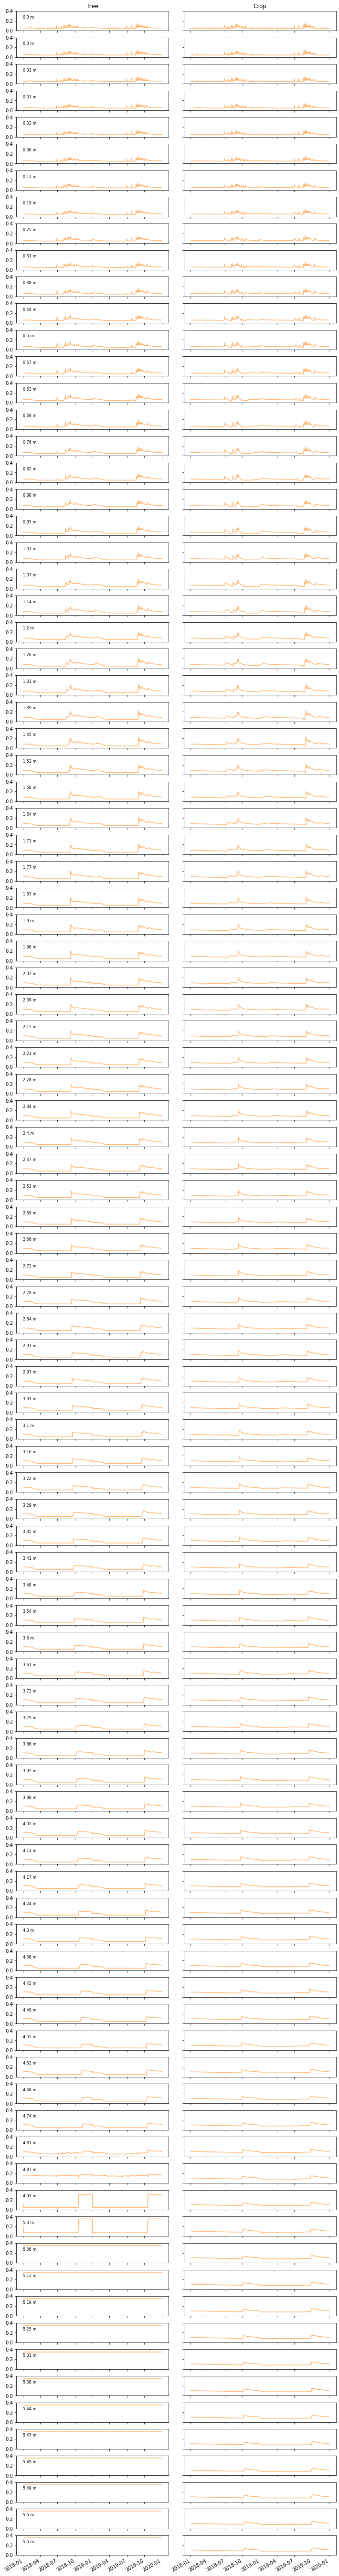

In [5]:
plot_soilmoisture(Onlycrop_96_layers)

#### Plot soilmoisture (REFINEBOTTOM = FALSE)  ==> 93 layers

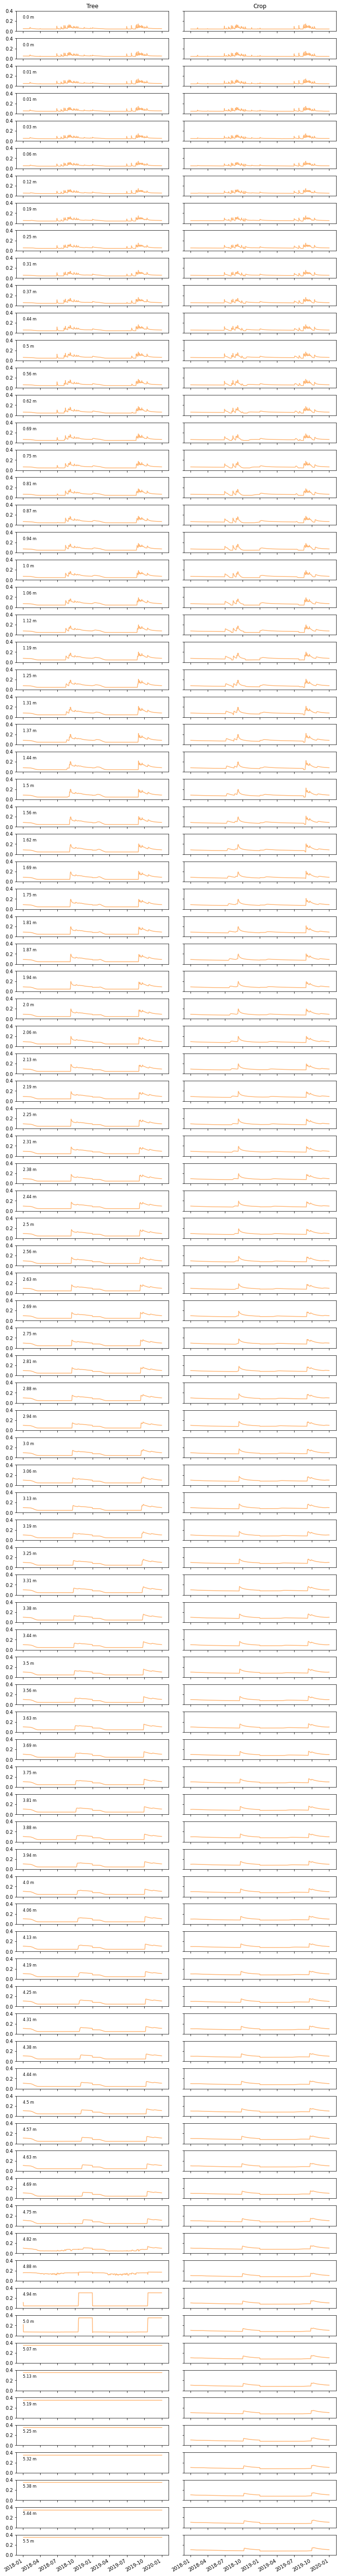

In [7]:
plot_soilmoisture(Onlycrop_93_layers)

In [9]:
len(Onlycrop_93_layers.solay)

93